# 0.0. Entender Problema

-- Objetivo do Problema:
    -- 1.0. Previsao do primeiro destino que um novo usuário irá escolher.
    
    -- Porque?
        -- Qual tipo de modelo de negócio do Airbnb?
            -- Marketplace ( Conectar pessoas que oferecem acomodacao, com pessoas que estao procurando acomodacao)
            -- Oferta ( pessoas oferecendo acomodacao )
                -- Tamanho do portfólio.
                -- Diversidade/Densidade de Portfólio.
                -- Preco Medio
                
            -- Demanda ( pessoas procurando acomodacao )
                -- Numero de Usuários
                -- LTV ( Lifetime Value )
                -- CAC ( Client Acquisition Cost )
                
                
               Gross Revenue = ( Fee*Numero cliente ) - CAC 
    
-- Proposta da Solucao

    --- Modelo de Predivao do primeiro destino de um novo usario.
    --- 1.0. Predicoes e salva em tabela do banco de dados. 
    --- 2.0. API 
            --- Input: usuario e suas caracteristicas
            --- Output: usuario e suas caracteristicas com a **predicao do destino**
            
    --- 16 ciclos
    
    https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings

# <font color='red'> Ciclo01: End to End </font>

# 0.0. Imports

In [79]:
import pandas as pd
from sklearn import model_selection as ms
from sklearn import preprocessing   as pp
from sklearn import metrics         as m
from scikitplot import metrics      as mt
from keras import models as ml
from keras import layers as l
import pandas_profiling

In [80]:
!pip install ipywidgets

In [81]:
%pwd
%ls

 Il volume nell'unità C è OS
 Numero di serie del volume: D6E5-9166

 Directory di C:\Users\Utente77\repos\airbnb_predict_first_booking

24/08/2022  19:20    <DIR>          .
24/08/2022  19:20    <DIR>          ..
06/05/2022  16:37             1.928 .gitignore
24/08/2022  18:44    <DIR>          .ipynb_checkpoints
24/08/2022  19:20         2.792.822 01_ab_airbnb_first_booking.ipynb
24/08/2022  18:42            27.054 ab_pipeline_cycle1.ipynb
24/08/2022  18:39    <DIR>          datasets
06/05/2022  16:37             1.096 LICENSE
06/08/2022  11:33            66.618 Live001_Ciclo01_End_to_End.ipynb
06/08/2022  11:33           124.200 Live002_Imbalanced_Metrics.ipynb
06/08/2022  11:33           183.496 Live003_Replacement_NA.ipynb
06/08/2022  11:33           189.775 Live004_Feature_Engineering.ipynb
06/08/2022  11:33           191.902 Live005_Balanced_Dataset.ipynb
06/08/2022  11:33           359.333 Live006_YT_EDA_Exploratory_Data_Analyis_Insights.ipynb
06/08/2022  11:33           263.67

## 0.1. Helper Functions

## 0.2. Loading Data

In [82]:
df_raw = pd.read_csv( 'datasets/train_users.csv', low_memory=True )
df_raw.shape

(213451, 16)

In [83]:
df_sessions = pd.read_csv( 'datasets/sessions.csv', low_memory=True )
df_sessions.shape

(10567737, 6)

# 1.0. Data Description

In [84]:
df1 = df_raw.copy()

In [85]:
print( 'Number of rows: {}'.format( df1.shape[0] ) )
print( 'Number of columns: {}'.format( df1.shape[1] ) )

Number of rows: 213451
Number of columns: 16


In [86]:
pandas_profiling.ProfileReport(df1)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


## 1.1. Data Type

In [87]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

## 1.2. NA Check

In [88]:
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [89]:
# remove missing value completly
df1 = df1.dropna()
df1.shape

(68171, 16)

## 1.3. Change Data Type

In [90]:
# date_account_created
df1['date_account_created'] = pd.to_datetime( df1['date_account_created'] )

# timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime( df1['timestamp_first_active'], format='%Y%m%d%H%M%S' )

# date_first_booking
df1['date_first_booking'] = pd.to_datetime( df1['date_first_booking'] )

# age
df1['age'] = df1['age'].astype( int )

C:\Users\Utente77\AppData\Local\Temp\ipykernel_18328\902979894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date_account_created'] = pd.to_datetime( df1['date_account_created'] )
C:\Users\Utente77\AppData\Local\Temp\ipykernel_18328\902979894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['timestamp_first_active'] = pd.to_datetime( df1['timestamp_first_active'], format='%Y%m%d%H%M%S' )
C:\Users\Utente77\AppData\Local\Temp\ipykernel_18328\902979894.py:8: SettingWithCopyWarning: 
A value i

In [91]:
df1.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                                 int32
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

## 1.4. Check Balanced Data

In [92]:
df1['country_destination'].value_counts( normalize=True )

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

# 2.0. Data Filtering

In [93]:
df2 = df1.copy()

## 2.1. Filtering Rows

## 2.2. Columns Selection

# 3.0. Data Preparation

In [94]:
df3 = df2.copy()

In [95]:
# dummy variable
df3_dummy = pd.get_dummies( df3.drop( ['id', 'country_destination'], axis=1 ) )

# join id and country destination
df3 = pd.concat( [df3[['id', 'country_destination']], df3_dummy], axis=1 )

# 4.0. Feature Selection

In [96]:
cols_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking'] # original dates
df4 = df3.drop( cols_drop, axis=1 )

# 5.0. Machine Learning Model  - Neural Network MLP

In [97]:
X = df4.drop( 'country_destination', axis=1 )
y = df4['country_destination'].copy()

In [98]:
# Split dataset into training and test
X_train, X_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.2, random_state=32 )

In [99]:
x_train = X_train.drop( 'id', axis=1 )
x_test = X_test.drop( 'id', axis=1 )

In [100]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform( y_train.values.reshape( -1, 1 ) ).toarray()

In [101]:
# model definition
model = ml.Sequential()
model.add( l.Dense( 128, input_dim=x_train.shape[1], activation='relu' ) )
model.add( l.Dense( 11, activation='softmax') )

# model compile
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

# train model
model.fit( x_train, y_train_nn, epochs=100 )

Epoch 1/100
1705/1705 [==============================] - 2s 748us/step - loss: 1.4090 - accuracy: 0.6977
Epoch 2/100
1705/1705 [==============================] - 1s 744us/step - loss: 1.2664 - accuracy: 0.7080
Epoch 3/100
1705/1705 [==============================] - 1s 750us/step - loss: 1.2499 - accuracy: 0.7083
Epoch 4/100
1705/1705 [==============================] - 1s 748us/step - loss: 1.2152 - accuracy: 0.7082
Epoch 5/100
1705/1705 [==============================] - 1s 744us/step - loss: 1.2001 - accuracy: 0.7085
Epoch 6/100
1705/1705 [==============================] - 1s 744us/step - loss: 1.1740 - accuracy: 0.7087
Epoch 7/100
1705/1705 [==============================] - 1s 746us/step - loss: 1.1640 - accuracy: 0.7088
Epoch 8/100
1705/1705 [==============================] - 1s 747us/step - loss: 1.1557 - accuracy: 0.7087
Epoch 9/100
1705/1705 [==============================] - 1s 770us/step - loss: 1.1442 - accuracy: 0.7087
Epoch 10/100
1705/1705 [==============================]

1705/1705 [==============================] - 1s 762us/step - loss: 1.0978 - accuracy: 0.7121
Epoch 79/100
1705/1705 [==============================] - 1s 751us/step - loss: 1.0976 - accuracy: 0.7119
Epoch 80/100
1705/1705 [==============================] - 1s 745us/step - loss: 1.0974 - accuracy: 0.7125
Epoch 81/100
1705/1705 [==============================] - 1s 755us/step - loss: 1.0969 - accuracy: 0.7123
Epoch 82/100
1705/1705 [==============================] - 1s 743us/step - loss: 1.0977 - accuracy: 0.7122
Epoch 83/100
1705/1705 [==============================] - 1s 773us/step - loss: 1.0971 - accuracy: 0.7122
Epoch 84/100
1705/1705 [==============================] - 1s 765us/step - loss: 1.0969 - accuracy: 0.7124
Epoch 85/100
1705/1705 [==============================] - 1s 760us/step - loss: 1.0965 - accuracy: 0.7120
Epoch 86/100
1705/1705 [==============================] - 1s 749us/step - loss: 1.0961 - accuracy: 0.7125
Epoch 87/100
1705/1705 [==============================] - 1

## 5.1. NN Performance

In [102]:
# prediction
pred_nn = model.predict( x_test )

# invert prediction
yhat_nn = ohe.inverse_transform( pred_nn )

# prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape( 1, -1 )[0]

427/427 [==============================] - 0s 527us/step


Accuracy: 0.7020902090209021


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

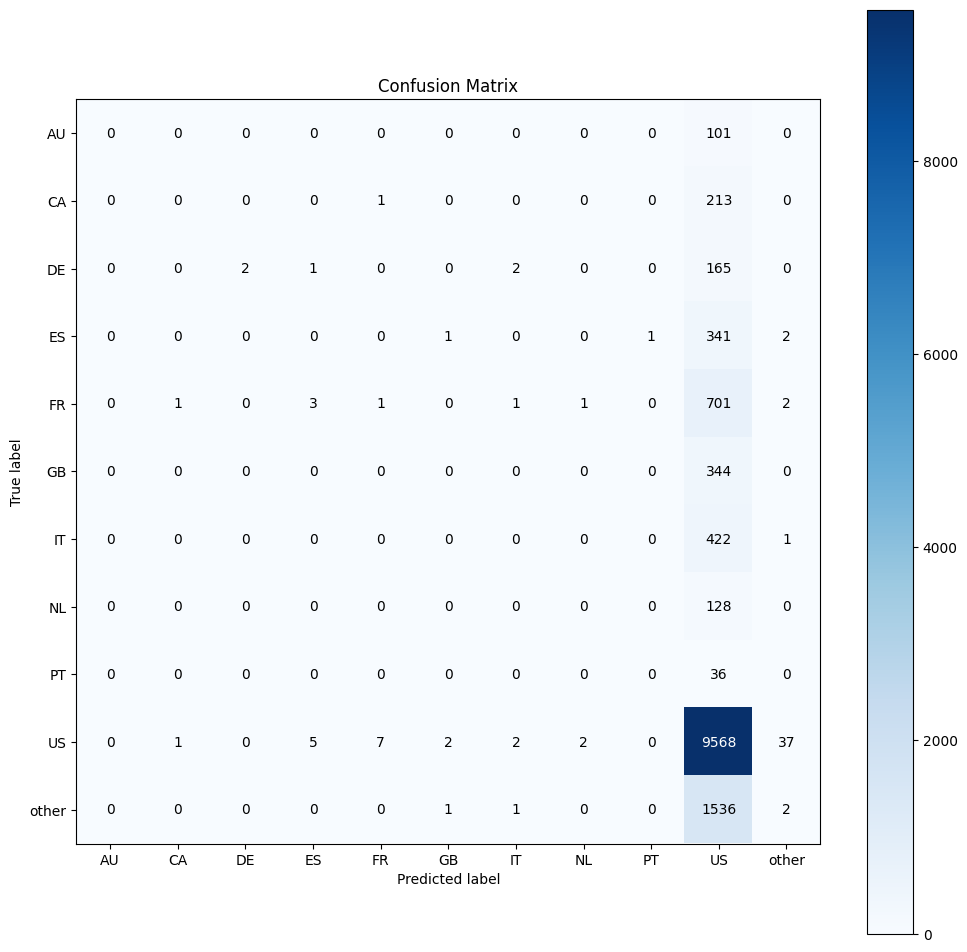

In [103]:
# Accuracy
acc_nn = m.accuracy_score( y_test_nn, yhat_nn )
print( 'Accuracy: {}'.format( acc_nn ) )

# Confusion Matrix
mt.plot_confusion_matrix( y_test_nn, yhat_nn, normalize=False, figsize=(12,12))


# Balanced Accuray
# F-Score Balanced
# Recall-Precison
# ROC 
# Kappa Metrics
# Matthew Metrics